In [1]:
import pandas as pd
import numpy as np

In [2]:
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[r'lp.csv']),encoding='latin-1')
df.head()

Saving lp.csv to lp.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preparation

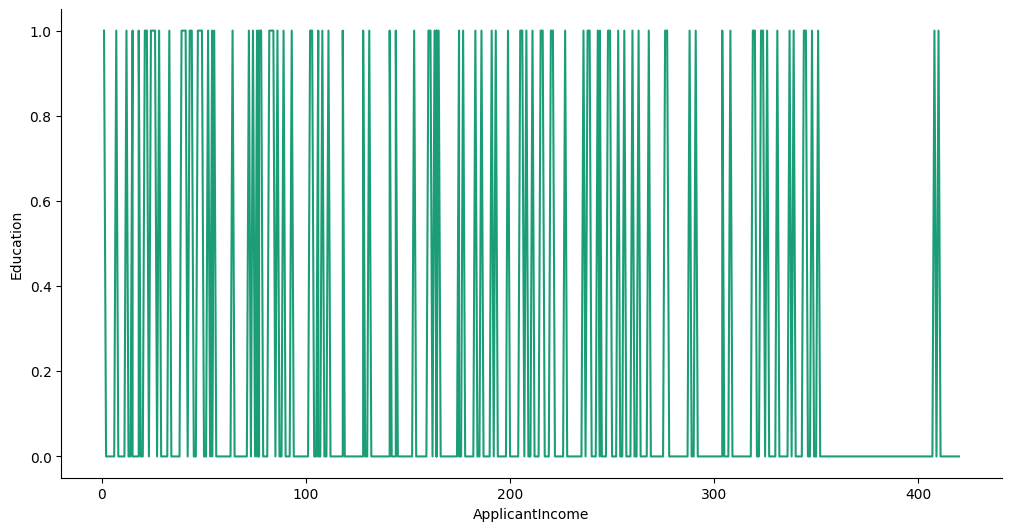

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ApplicantIncome']
  ys = series['Education']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ApplicantIncome', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ApplicantIncome')
_ = plt.ylabel('Education')

In [3]:
df.shape

(598, 13)

<Axes: >

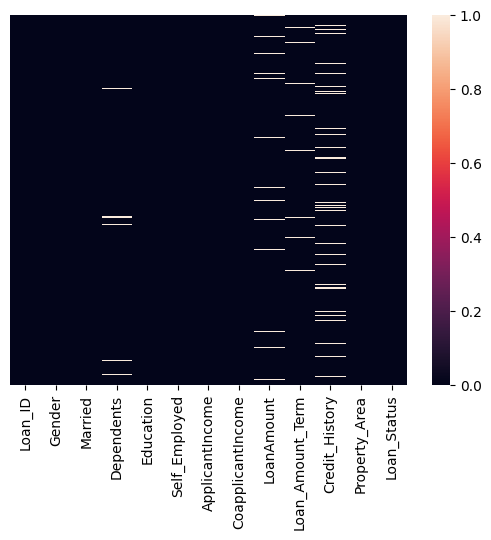

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),yticklabels=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [27]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Debt,Dependents_to_Income_Ratio
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,252.148810,0.815476,0.640873,0.773810,0.204365,0.180556,208.202381,66.593254,82.811508,6.660714,0.859127,1.015873,0.700397,0.012948,0.011836
std,146.031832,0.388296,0.480221,1.016968,0.403638,0.385032,119.127105,78.355585,44.291127,1.105725,0.348236,0.777252,0.458539,0.055299,0.093969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.750000,1.000000,0.000000,0.000000,0.000000,0.000000,104.750000,0.000000,50.000000,7.000000,1.000000,0.000000,0.000000,0.002761,0.000000
50%,252.500000,1.000000,1.000000,0.000000,0.000000,0.000000,206.500000,26.500000,77.500000,7.000000,1.000000,1.000000,1.000000,0.004107,0.000000
75%,378.250000,1.000000,1.000000,2.000000,0.000000,0.000000,310.250000,131.250000,114.250000,7.000000,1.000000,2.000000,1.000000,0.007890,0.007092
max,504.000000,1.000000,1.000000,3.000000,1.000000,1.000000,420.000000,239.000000,189.000000,8.000000,1.000000,2.000000,1.000000,1.000000,2.000000


from matplotlib import pyplot as plt
_df_0['Loan_ID'].plot(kind='hist', bins=20, title='Loan_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Married'].plot(kind='hist', bins=20, title='Married')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Dependents'].plot(kind='hist', bins=20, title='Dependents')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Loan_ID', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Gender', y='Married', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Married', y='Dependents', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Dependents', y='Education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Loan_ID'].plot(kind='line', figsize=(8, 4), title='Loan_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Married'].plot(kind='line', figsize=(8, 4), title='Married')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Dependents'].plot(kind='line', figsize=(8, 4), title='Dependents')
plt.gca().spines[['top', 'right']].set_visible(False)

In [29]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Debt,Dependents_to_Income_Ratio
Loan_ID,1.000000,-0.023146,0.001586,0.066706,0.039350,0.047962,0.029486,-0.047235,0.041907,-0.007505,-0.014169,-0.189486,0.043183,0.008409,0.009900
Gender,-0.023146,1.000000,0.347585,0.201203,0.050814,-0.029365,0.061152,0.190617,0.144321,-0.085911,0.013215,-0.003450,0.057358,-0.103590,-0.077978
Married,0.001586,0.347585,1.000000,0.382901,-0.000102,-0.014187,-0.005955,0.201955,0.189080,-0.087651,0.017856,0.036608,0.106282,0.031493,0.084396
Dependents,0.066706,0.201203,0.382901,1.000000,0.020814,0.028348,0.142967,-0.042647,0.154151,-0.084295,-0.034016,0.014612,0.033447,0.018894,0.142772
Education,0.039350,0.050814,-0.000102,0.020814,1.000000,0.005152,-0.186132,-0.065003,-0.177659,-0.098236,-0.049363,-0.073730,-0.065962,0.065616,0.085206
Self_Employed,0.047962,-0.029365,-0.014187,0.028348,0.005152,1.000000,0.174613,-0.030443,0.082789,-0.023932,0.012150,-0.069384,0.002972,0.068724,0.103931
ApplicantIncome,0.029486,0.061152,-0.005955,0.142967,-0.186132,0.174613,1.000000,-0.254460,0.538285,-0.012141,0.033852,-0.062516,-0.023964,-0.279351,-0.151322
CoapplicantIncome,-0.047235,0.190617,0.201955,-0.042647,-0.065003,-0.030443,-0.254460,1.000000,0.278856,0.004164,-0.022651,-0.063255,0.014087,0.129328,0.071754
LoanAmount,0.041907,0.144321,0.189080,0.154151,-0.177659,0.082789,0.538285,0.278856,1.000000,0.069610,-0.023509,-0.099128,-0.046151,-0.121344,-0.054747
Loan_Amount_Term,-0.007505,-0.085911,-0.087651,-0.084295,-0.098236,-0.023932,-0.012141,0.004164,0.069610,1.000000,0.030518,-0.072372,0.010853,0.033980,-0.011541


from matplotlib import pyplot as plt
_df_12['Loan_ID'].plot(kind='hist', bins=20, title='Loan_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Married'].plot(kind='hist', bins=20, title='Married')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Dependents'].plot(kind='hist', bins=20, title='Dependents')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Loan_ID', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Gender', y='Married', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Married', y='Dependents', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Dependents', y='Education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Loan_ID'].plot(kind='line', figsize=(8, 4), title='Loan_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Married'].plot(kind='line', figsize=(8, 4), title='Married')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Dependents'].plot(kind='line', figsize=(8, 4), title='Dependents')
plt.gca().spines[['top', 'right']].set_visible(False)

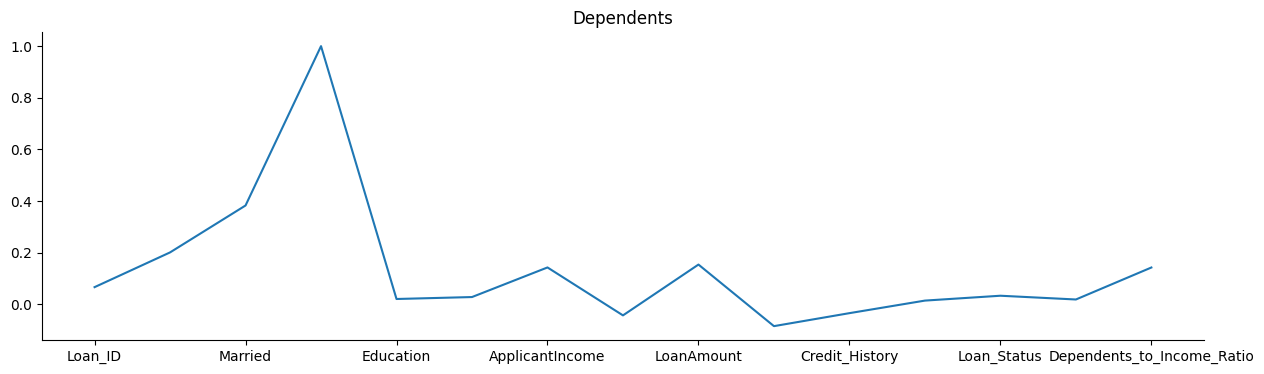

In [34]:
from matplotlib import pyplot as plt
_df_23['Dependents'].plot(kind='line', figsize=(15, 4), title='Dependents')
plt.gca().spines[['top', 'right']].set_visible(False)

Data Cleaning


In [6]:
duplicates = df.duplicated()
print(duplicates)


0      False
1      False
2      False
3      False
4      False
       ...  
593    False
594    False
595    False
596    False
597    False
Length: 598, dtype: bool


In [7]:
df.dropna(inplace=True)

<Axes: >

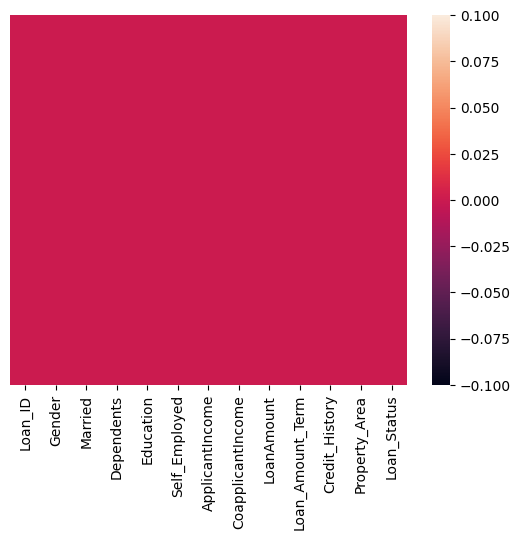

In [8]:
sns.heatmap(df.isnull(),yticklabels=False)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['ApplicantIncome']=le.fit_transform(df['ApplicantIncome'])
df['CoapplicantIncome']=le.fit_transform(df['CoapplicantIncome'])
df['LoanAmount']=le.fit_transform(df['LoanAmount'])
df['Loan_Amount_Term']=le.fit_transform(df['Loan_Amount_Term'])
df['Credit_History']=le.fit_transform(df['Credit_History'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,258,52,78,7,1,0,0
2,1,1,1,0,0,1,118,0,24,7,1,2,1
3,2,1,1,0,1,0,76,141,70,7,1,2,1
4,3,1,0,0,0,0,318,0,91,7,1,2,1
5,4,1,1,2,0,1,294,204,161,7,1,2,1


Feature Engineering

In [10]:
df['Debt'] = df['Credit_History'] / df['ApplicantIncome']
 ## 3. Dependents-to-Income Ratio
df['Dependents_to_Income_Ratio'] = df['Dependents'] / df['ApplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Debt,Dependents_to_Income_Ratio
1,0,1,1,1,0,0,258,52,78,7,1,0,0,0.003876,0.003876
2,1,1,1,0,0,1,118,0,24,7,1,2,1,0.008475,0.000000
3,2,1,1,0,1,0,76,141,70,7,1,2,1,0.013158,0.000000
4,3,1,0,0,0,0,318,0,91,7,1,2,1,0.003145,0.000000
5,4,1,1,2,0,1,294,204,161,7,1,2,1,0.003401,0.006803


In [11]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [12]:
df.dropna(inplace=True)

In [13]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['ApplicantIncome', 'Credit_History']] = scaler.fit_transform(X[['ApplicantIncome', 'Credit_History']])

In [16]:
from sklearn.feature_selection import SelectKBest, chi2
X[['ApplicantIncome', 'Credit_History']] = X[['ApplicantIncome', 'Credit_History']].abs()# Ensure non-negative values
selector = SelectKBest(score_func=chi2, k=7)
selector.fit(X, y) # Get the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'CoapplicantIncome',
       'LoanAmount', 'Credit_History'],
      dtype='object')


In [17]:
# Create a DataFrame with the selected features
d = X[selected_features]
d.tail()

,Loan_ID,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Credit_History
593,500,0,0,0,0,27,0.404935
594,501,1,3,0,0,7,0.404935
595,502,1,1,0,3,156,0.404935
596,503,1,2,0,0,128,0.404935
597,504,0,0,0,0,83,2.469533


Model Buliding

In [18]:
x=d
y=df['Loan_Status']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 87.13%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.52      0.67        25
           1       0.86      0.99      0.92        76

    accuracy                           0.87       101
   macro avg       0.90      0.75      0.79       101
weighted avg       0.88      0.87      0.86       101



Prediction with New Data

In [26]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

new_data = {
    'Loan_ID': [5, 6],
    'Married': [1, 0],  # Assuming 1 for Married, 0 for Single
    'Dependents': [0, 0],  # Assuming 0 dependents for both
    'Education': [1,1],
    'ApplicantIncome': [4500, 2200],
    'CoapplicantIncome': [0, 0],  # Assuming 0 coapplicant income
    'LoanAmount': [100000, 50000],  # Provide loan amount values
    'Credit_History': [1, 0]
}

# Convert new_data to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Select the same features from new_data_df for prediction
new_data_for_prediction = new_data_df[d.columns]

# Make predictions on the processed data
predictions = lr.predict(new_data_for_prediction)

# Add predictions back to the original DataFrame
new_data_df['Predicted_Loan_Status'] = predictions

new_data_df.head()

,Loan_ID,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Predicted_Loan_Status
0,5,1,0,1,4500,0,100000,1,0
1,6,0,0,1,2200,0,50000,0,0
